<a href="https://colab.research.google.com/github/wongwara/AT2_Classification/blob/main/MLAA_Lab_6_Exercise_3_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Random Forest & ExtraTrees**


## Exercise 3: Multivariate Regression with ExtraTrees

We are going to use a dataset from UCI Machine Learning Repository which contains the price of 506 houses in the city of Boston in the USA (https://archive.ics.uci.edu/ml/machine-learning-databases/housing/).

We will be loading the data from here:
https://raw.githubusercontent.com/aso-uts/mlaa/main/datasets/lab6/ex3/boston_housing.csv

The columns are:
1.   CRIM: per capita crime rate by town.
2.   ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3.   INDUS: proportion of non-retail business acres per town.
4.   CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5.   NOX: nitrogen oxides concentration (parts per 10 million).
6.   RM: average number of rooms per dwelling.
7.   SGE: proportion of owner-occupied units built prior to 1940.
8.   DIS: weighted mean of distances to five Boston employment centres.
9.   RAD: index of accessibility to radial highways.
10.  TAX: full-value property-tax rate per \$10,000.
11.  PTRATIO: pupil-teacher ratio by town.
12.  LSTAT: lower status of the population (percent).
13.  MEDV: median value of owner-occupied homes in $1000s.


We want to predict house price (**"medv"**) using all the available features.

The steps are:
1.   Load and Explore Dataset
2.   Prepare Data
3.   Split Data
4.   Assess Baseline Model
5.   Train ExtraTrees with Default Hyperparameter
6.   Hyperparameters tuning using Cross-Validation
7.   Features Importance

### 1. Load and Explore Dataset

**[1.1]** Import the pandas and numpy package

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
import pandas as pd
import numpy as np

**[1.2]** Create a variable called file_url containing the link to the CSV file and load the dataset into dataframe called df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
file_url = 'https://raw.githubusercontent.com/aso-uts/mlaa/main/datasets/lab6/ex3/boston_housing.csv'
df = pd.read_csv(file_url)

In [ ]:
# Unit Tests
assert isinstance(file_url, str)
assert isinstance(df, pd.DataFrame)

**[1.3]** Display the first 5 rows of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**[1.4]** Display the dimensions (shape) of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.shape

(506, 13)

We can see that the dataframe contains 506 rows and 13 columns.

**[1.5]** Display the summary (info) of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**[1.6]** Display the descriptive statistics of df


In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 2. Prepare Data

**[2.1]** Create a copy of df and save it into a variable called df_cleaned


In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned = df.copy()

In [ ]:
# Unit Tests
assert isinstance(df_cleaned, pd.DataFrame)
assert df_cleaned.shape == df.shape

**[2.2]**  Split the target (X) and the features (Y)

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X = df_cleaned.drop('MEDV', axis=1)
y = df_cleaned['MEDV']

In [ ]:
# Unit Tests
assert X.shape == (506, 12)
assert y.shape == (506, )

## 3. Split Data


**[3.1]** Import train_test_split from sklearn.model_selection 

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.model_selection import train_test_split

**[3.2]** Split randomly the dataset with random_state=8 into 2 different sets: data (80%) and test (20%)

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X_data, X_test, y_data, y_test = train_test_split (X, y, test_size=0.2, random_state=8)

**[3.3]** Split randomly the remaining data with random_state=8 into 2 different sets: training (80%) and validation (20%)

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X_train, X_val, y_train, y_val = train_test_split (X_data, y_data, test_size=0.2, random_state=8)

In [ ]:
# Unit Tests
assert X_train.shape == (323, 12)
assert y_train.shape == (323,)
assert X_val.shape == (81, 12)
assert y_val.shape == (81,)
assert X_test.shape == (102, 12)
assert y_test.shape == (102,)

**[3.4]** Plot the histograms of the target variable for the training set

In [ ]:
# Placeholder for student's code

<Axes: >

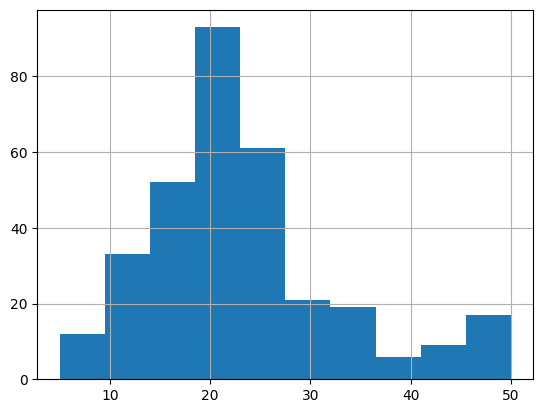

In [ ]:
# Solution
y_train.hist()

**[3.5]** Plot the histograms of the target variable for the validation set

In [ ]:
# Placeholder for student's code

<Axes: >

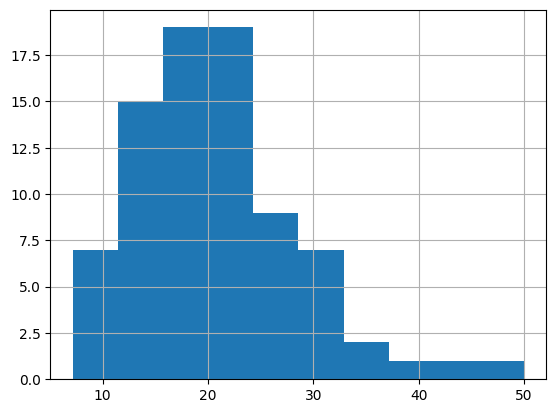

In [ ]:
# Solution
y_val.hist()

**[3.6]** Plot the histograms of the target variable for the testing set

In [ ]:
# Placeholder for student's code

<Axes: >

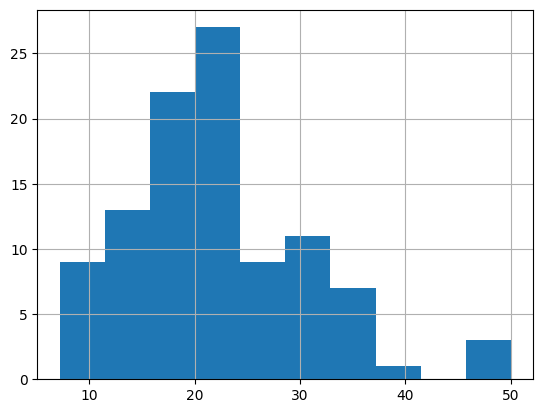

In [ ]:
# Solution
y_test.hist()

## 4. Assess Baseline Model

**[4.1]** Find the average of the target variable for the training set and print its value

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_mean = y_train.mean()
y_mean

23.101857585139317

**[4.2]** Create a numpy array called y_base filled with this value

In [ ]:
# Placeholder for student's code

In [ ]:
y_base = np.full(y_train.shape, y_mean)

**[4.3]** Import the MSE and MAE from sklearn

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

**[4.4]** Display the RMSE and MAE scores on the training set of this baseline model

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
print(mse(y_train, y_base, squared=False))
print(mae(y_train, y_base))

9.636816478666338
6.91994747385674


### 5. Train ExtraTrees with Default Hyperparameter

**[5.1]** Import the ExtraTreesRegressor from sklearn.ensemble

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.ensemble import ExtraTreesRegressor

**[5.2]** instantiate the ExtraTreesRegressor class called 'et' with a random state=8

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
et = ExtraTreesRegressor(random_state=8)

**[5.3]** Fit the ExtraTress model

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
et.fit(X_train, y_train)

ExtraTreesRegressor(random_state=8)

**[5.4]** Calculate the RMSE score of the model on the training and validation sets and print them

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
print(mse(y_train, et.predict(X_train), squared=False))
print(mse(y_val, et.predict(X_val), squared=False))

3.2188987922168716e-14
3.8147490832165154


**[5.5]** Calculate the MAE score of the model on the training and validation sets and print them

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
print(mae(y_train, et.predict(X_train)))
print(mae(y_val, et.predict(X_val)))

2.3540852789637067e-14
2.2701481481481474


## 6. Hyperparameters tuning using Random Search

**[6.1]** Import the RandomizedSearchCV package from sklearn.model_selection and randint from scipy.stats 

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

**[6.2]** Create a variable called random_dist containing the  RandomSearch hyperparameters values: 
- n_estimators: random integer between 50 and 200
- min_samples_leaf: random integer between 1 and 10
- max_depth: random integer between 3 and 7 
- max_features: random integer between 2 and 6

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
random_dist = {
    'n_estimators': randint(50, 200),
    'min_samples_leaf': randint(1, 10),
    'max_depth': randint(3, 7),
    'max_features': randint(2, 6)
}
random_dist

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x7f9175d1e490>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x7f9175af7490>,
 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x7f9175afa100>,
 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x7f9175af7f70>}

In [ ]:
# Unit Tests
assert isinstance(random_dist, dict)
assert random_dist.get('n_estimators') is not None
assert random_dist.get('min_samples_leaf') is not None
assert random_dist.get('max_depth') is not None
assert random_dist.get('max_features') is not None

**[6.3]** Instantiate the ExtraTrees class called et1 with a random state=8

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
et1 = ExtraTreesRegressor(random_state=8)

**[6.4]** Instantiate a RandomizedSearchCV with the hyperparameter values, the extratrees model and 5 cross validation splits

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
random_search_et = RandomizedSearchCV(et1, random_dist, random_state=8, scoring='neg_root_mean_squared_error', cv=5, verbose=1)

**[6.5]** Fit the RandomizedSearchCV on the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
random_search_et.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=8),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9175afa100>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9175af7f70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9175af7490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9175d1e490>},
                   random_state=8, scoring='neg_root_mean_squared_error',
                   verbose=1)

**[6.6]** Display the best set of hyperparameters

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
random_search_et.best_params_

{'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 152}

**[6.7]** Extract the best model and save it into a variable called et2

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
et2 = random_search_et.best_estimator_

**[6.8]** Calculate the accuracy of the model on all sets and print them

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
print(mse(y_train, et2.predict(X_train), squared=False))
print(mse(y_val, et2.predict(X_val), squared=False))

3.3788486862845866
4.3967399128422056


### 7. Features Importance


**[7.1]** Print the features importance of our ExtraTrees model

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
et.feature_importances_

array([0.03240285, 0.00499001, 0.02914155, 0.01695266, 0.03484653,
       0.37793949, 0.01841753, 0.02549261, 0.01730386, 0.03815817,
       0.06461864, 0.33973608])

**[7.2]** Create a new dataframe "**feat_imp_et_df**" with the features importances and their name

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
feat_imp_et_df = pd.DataFrame(
    {
    'feature': X_train.columns,
     'feature_importance': et.feature_importances_
     }
)

**[7.3]** Import the altair package

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
import altair as alt

**[7.4]** Create a bar chart showing the features importance for our ExtraTree model

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
alt.Chart(feat_imp_et_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)